In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("/home/jatin/ML & AI/Dataset/1 Wilcoxon.xlsx",sheet_name = 0)
df.head()

,ID,TRT,AGE,WEIGHIN,STAGE,TOTALCIN,TOTALCW2,TOTALCW4,TOTALCW6
0,1,0,52,124.0,2,6,6,6,7
1,5,0,77,160.0,1,9,6,10,9
2,6,0,60,136.5,4,7,9,17,19
3,9,0,61,179.6,1,6,7,9,3
4,11,0,59,175.8,2,6,7,16,13


In [4]:
from scipy.stats import wilcoxon

In [16]:
stats,p = wilcoxon(df.TOTALCIN,df.TOTALCW2)
print(stats,p)
if p<0.05:
    print('Accept Alternate Hypothesis')
else:
    print('Accept Null Hypothesis')

29.5 0.00259741456482452
Accept Alternate Hypothesis


In [6]:
from scipy.stats import friedmanchisquare

In [15]:
stats,p = friedmanchisquare(df.TOTALCIN,df.TOTALCW2,df.TOTALCW4)
print(stats,p)
if p<0.05:
    print('Accept NA')
else:
    print('Accept N0')

27.927710843373504 8.62133745016363e-07
Accept NA


In [13]:
df1 = pd.read_excel("/home/jatin/ML & AI/Dataset/3 Mann Whitney.xlsx",sheet_name = 1)
df1.head()

,Design1,Design2
0,11,12
1,17,10
2,16,15
3,14,19
4,15,11


In [12]:
from scipy.stats import mannwhitneyu

In [17]:
stats,p = mannwhitneyu(df1.Design1,df1.Design2)
print(stats,p)
if p<0.05:
    print('Accept NA')
else:
    print('Accept N0')

9.0 0.2641796636354743
Accept N0


In [18]:
df2 = pd.read_excel("/home/jatin/ML & AI/Dataset/4 Kruskal Wallis.xlsx",sheet_name=0)
df2.head()

,Design1,Design2,Design3,Showroom
0,11,12,23,1
1,17,10,20,2
2,16,15,18,3
3,14,19,17,4
4,15,11,10,5


In [19]:
from scipy.stats import kruskal

In [20]:
stats,p = kruskal(df2.Design1,df2.Design2,df2.Design3)

In [21]:
print(stats,p)
if p<0.05:
    print('Accept NA')
else:
    print('Accept N0')

2.7345323741007226 0.25480259087913626
Accept N0


In [22]:
df3 = pd.read_excel("/home/jatin/ML & AI/Dataset/1. One Sample.xlsx",sheet_name=0)
df3.head()

,ids,Height
0,43783,72.35
1,20278,70.66
2,20389,70.68
3,24559,67.43
4,28980,68.45


In [23]:
import matplotlib.pyplot as plt

(array([15., 17., 53., 90., 88., 65., 49., 17., 10.,  4.]),
 array([55.   , 57.941, 60.882, 63.823, 66.764, 69.705, 72.646, 75.587,
        78.528, 81.469, 84.41 ]),
 <a list of 10 Patch objects>)

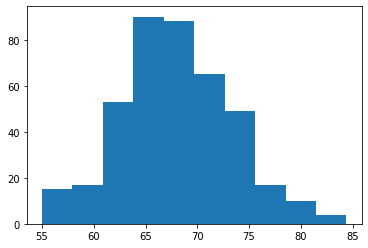

In [29]:
plt.hist(df3.Height)

In [30]:
from scipy.stats import ttest_1samp
df3.head()

,ids,Height
0,43783,72.35
1,20278,70.66
2,20389,70.68
3,24559,67.43
4,28980,68.45


In [32]:
stats,p = ttest_1samp(df3.Height,65)
print(stats,p)
if p<0.05:
    print('Accept NA')
else:
    print('Accept N0')

11.498800238580099 1.087893570160242e-26
Accept NA


In [36]:


import statsmodels.api as sm

from statsmodels.formula.api import ols

dataset=pd.read_excel("/home/jatin/ML & AI/Dataset/ANCOVA1.xlsx",sheet_name=0)

dataset.head()

,Store Number,Sales,Promotion,Coupon,ClietelRatings
0,1,10,1,1,9
1,2,9,1,1,10
2,3,10,1,1,8
3,4,8,1,1,4
4,5,9,1,1,6


In [37]:
model=ols('Sales~C(Promotion)',dataset).fit()

oneway=sm.stats.anova_lm(model,typ=2)

print(oneway)

                  sum_sq    df          F    PR(>F)
C(Promotion)  106.066667   2.0  17.943609  0.000011
Residual       79.800000  27.0        NaN       NaN


In [38]:
model=ols('Sales~C(Promotion)*C(Coupon)',dataset).fit()

twoway=sm.stats.anova_lm(model,typ=2)

print(twoway)

                            sum_sq    df          F        PR(>F)
C(Promotion)            106.066667   2.0  54.862069  1.116908e-09
C(Coupon)                53.333333   1.0  55.172414  1.143879e-07
C(Promotion):C(Coupon)    3.266667   2.0   1.689655  2.058092e-01
Residual                 23.200000  24.0        NaN           NaN
